<a href="https://www.kaggle.com/alperenkaran/understanding-confidence-intervals?scriptVersionId=90124843" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import scipy.stats as st

# Aim: Finding population mean

Assume that we have a population and we can get one measurement from every person. 

The population can be very large, for example, all people in a country. 

The measurement is a single observation from each individual. For instance, the height of each person.

**Problem:** We cannot measure the height of every person in a country. It is too much work.

**Solution:** We collect data from a sample, and compute the confidence interval.

**Assumption:** The measurements from the population is normally distributed.

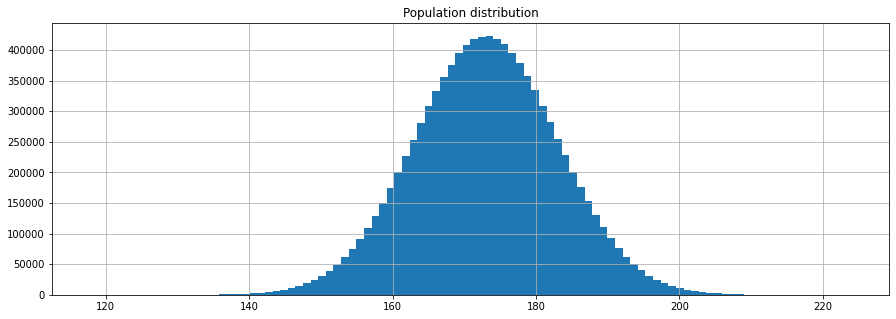

In [2]:
# Let's create a normally distributed population with 10 million people.

population = np.random.normal(size=10000000, loc=173, scale=10) 

plt.figure(figsize=(15,5))
plt.hist(population, bins=100)
plt.grid()
plt.title('Population distribution')
plt.show()

In [3]:
population_mean = np.round(np.mean(population),2)
print('The population mean is', population_mean, 'and nobody knows this value.')

The population mean is 173.0 and nobody knows this value.


# Selecting a sample of 10 people

We can measure the heights of 10 people, right? It is not as impossible as measuring the heights of 10 million people.

In [4]:
sample = np.random.choice(population, size=10)
print('\nThe sample mean is', np.round(np.mean(sample),2), '\n\nWe collected the data from the sample and we know this value.')


The sample mean is 166.27 

We collected the data from the sample and we know this value.


In [5]:
def confidence_interval(sample, prob):
    return st.t.interval(prob, len(sample)-1, loc=np.mean(sample), scale=st.sem(sample))

In [6]:
print('The 0.95 confidence interval generated from this sample is', confidence_interval(sample, prob=0.95))

The 0.95 confidence interval generated from this sample is (160.81357500440762, 171.73347617627113)


We hope that this interval will contain the population mean.

But if we are **very unlucky**, this interval will not contain the population mean.

For example, for this sample, the confidence interval does not contain the population mean 173.0

# How much luck do we need?

If you are using a 95% confidence interval, it means that for every 100 sample, 95 of the confidence intervals will contain the population mean.

# Then why don't we always use 99% confidence intervals?

Sometimes we do. But 99% confidence intervals are larger.

If I were to say **"I am very sure that the people in this country have an average height between 100 and 250 cm"** 

then you would probably respond with **"Thank you captain obvious, but it does not help at all."**

This is why we don't want to increase confidence level too much.

# Then why don't we always use 80% confidence intervals?

Sometimes we do. But such confidence intervals fail a lot.

If I were to say **"I am not really sure but the people have an average height between 165 and 167 cm"**

Then you would probably respond with **"Why are you telling me stuff that you are not sure?"**

This is why we don't want to decrease confidence level too much.

# Let's select 100 samples!

In [7]:
number_of_correct_guesses = 0

for i in range(100):
    sample = np.random.choice(population, size=10)
    conf_interval = confidence_interval(sample, prob=0.95)
    
    if population_mean >= conf_interval[0] and population_mean <= conf_interval[1]:
        number_of_correct_guesses += 1
        
print(f'Out of 100 samples, the confidence intervals for {number_of_correct_guesses} of them contained the population mean.')

Out of 100 samples, the confidence intervals for 93 of them contained the population mean.


Hey look! 93 is very close to 95!